# Semester Project - Machine Learning
Project made by Nicolas Gregori SUPSI - 2021

In [1]:
autosave 30

Autosaving every 30 seconds


In [2]:
#Various imports
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Dataset description
The dataset contains includes a hourly/daily summary for Szeged, a city located in Hungary, between 2006 and 2016. It contains the following columns: 
- **Formatted Date**
- **Summary**  (weather forecast by hour)
- **Precip Type**
- **Temperature** (in Celsius Degrees)
- **Apparent Temperature** (in Celsius Degrees)
- **Humidity**
- **Wind Speed** (in km/h)
- **Wind Bearing** (degrees)
- **Visibility** (km)
- **Loud Cover**
- **Pressure** (in millibars)
- **Daily Summer** (weather forecast by day)

Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion).

In [3]:
#Defining portion for train, validation and testing phase
validation_portion = 0.3
test_portion = 0.1 

In [4]:
#Load the dataset from memory 
df_path = "./resources/weatherHistory.csv"
df = pd.read_csv(df_path)

In [25]:
#Print dataset's head      
df.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
9597,2007-08-12 19:00:00+00:00,Mostly Cloudy,rain,18.938889,18.938889,0.84,7.7924,233.0,9.9820,0.0,1008.04,Partly cloudy throughout the day.,2007-08-12 19:00:00+00:00
26204,2008-09-04 18:00:00+00:00,Partly Cloudy,rain,24.122222,24.122222,0.46,7.8568,209.0,10.3523,0.0,1012.41,Partly cloudy starting overnight continuing un...,2008-09-04 18:00:00+00:00
6282,2006-05-26 17:00:00+00:00,Mostly Cloudy,rain,20.088889,20.088889,0.60,10.9480,346.0,9.9820,0.0,1019.48,Mostly cloudy throughout the day.,2006-05-26 17:00:00+00:00
92330,2016-06-02 03:00:00+00:00,Overcast,rain,14.466667,14.466667,0.99,15.4077,291.0,6.8425,0.0,1011.14,Mostly cloudy throughout the day.,2016-06-02 03:00:00+00:00
51067,2011-11-06 19:00:00+00:00,Mostly Cloudy,rain,9.716667,7.405556,0.67,16.4703,149.0,9.9015,0.0,1023.45,Mostly cloudy starting overnight continuing un...,2011-11-06 19:00:00+00:00


In [26]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 9597 to 45198
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Formatted Date          9645 non-null   datetime64[ns, UTC]
 1   Summary                 9645 non-null   object             
 2   Precip Type             9597 non-null   object             
 3   Temperature             9645 non-null   float64            
 4   Apparent Temperature    9645 non-null   float64            
 5   Humidity                9645 non-null   float64            
 6   Wind Speed              9645 non-null   float64            
 7   Wind Bearing (degrees)  9645 non-null   float64            
 8   Visibility (km)         9645 non-null   float64            
 9   Loud Cover              9645 non-null   float64            
 10  Pressure (millibars)    9645 non-null   float64            
 11  Daily Summary           9645 non-null  

In [7]:
#Getting rows and columns' number
dfNumber = df.shape
print(f"Row number: {dfNumber}")

Row number: (96453, 12)


In [8]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


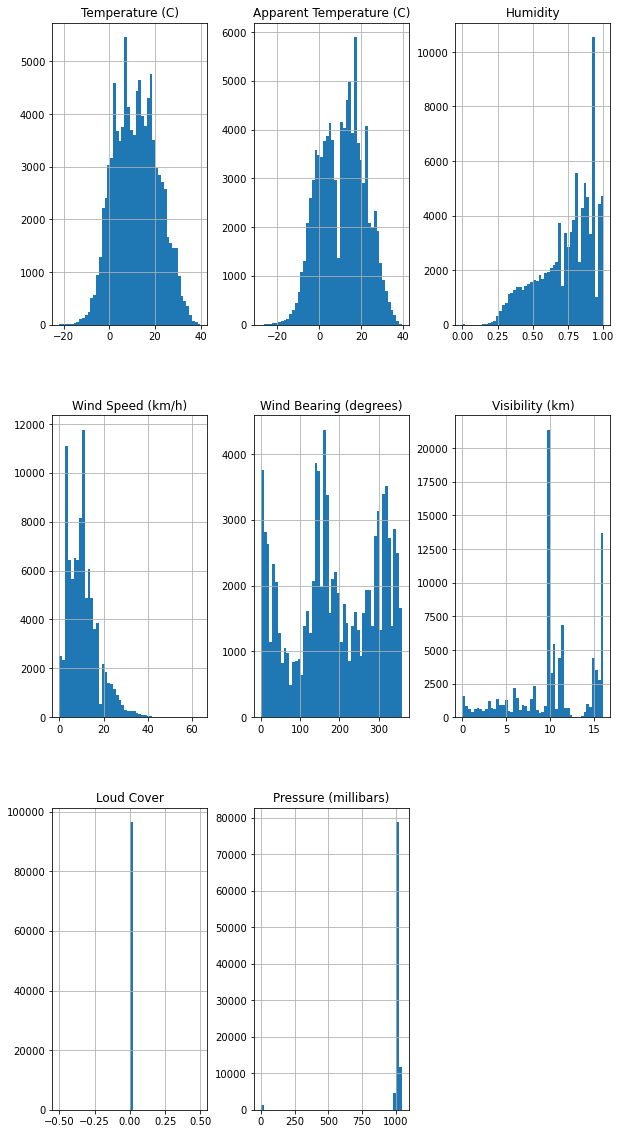

In [9]:
#Print data distribution
df.hist(bins = 50, figsize = (10,20))
plt.show()

In [15]:
#Just for reduce the name of columns used
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature"})
#df = df.sample(frac = 0.1 ,axis = 0,random_state = 1)


,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
9597,2007-08-12 19:00:00+00:00,Mostly Cloudy,rain,18.938889,18.938889,0.84,7.7924,233.0,9.9820,0.0,1008.04,Partly cloudy throughout the day.
26204,2008-09-04 18:00:00+00:00,Partly Cloudy,rain,24.122222,24.122222,0.46,7.8568,209.0,10.3523,0.0,1012.41,Partly cloudy starting overnight continuing un...
6282,2006-05-26 17:00:00+00:00,Mostly Cloudy,rain,20.088889,20.088889,0.60,10.9480,346.0,9.9820,0.0,1019.48,Mostly cloudy throughout the day.
92330,2016-06-02 03:00:00+00:00,Overcast,rain,14.466667,14.466667,0.99,15.4077,291.0,6.8425,0.0,1011.14,Mostly cloudy throughout the day.
51067,2011-11-06 19:00:00+00:00,Mostly Cloudy,rain,9.716667,7.405556,0.67,16.4703,149.0,9.9015,0.0,1023.45,Mostly cloudy starting overnight continuing un...
...,...,...,...,...,...,...,...,...,...,...,...,...
73532,2014-01-28 19:00:00+00:00,Overcast,snow,-2.872222,-6.000000,0.79,7.7441,71.0,5.9731,0.0,1005.10,Foggy until morning.
41745,2010-11-12 09:00:00+00:00,Mostly Cloudy,rain,11.177778,11.177778,0.85,20.2216,200.0,6.8425,0.0,1006.98,Foggy overnight.
27299,2009-08-19 09:00:00+00:00,Partly Cloudy,rain,27.033333,26.655556,0.35,11.3344,351.0,10.3684,0.0,1023.20,Partly cloudy starting in the morning continui...
87639,2015-09-08 16:00:00+00:00,Mostly Cloudy,rain,18.722222,18.722222,0.40,12.6224,338.0,16.1000,0.0,1020.62,Partly cloudy throughout the day.


In [69]:
df['Date'] = df['Formatted Date'].apply(pd.to_datetime , utc = True)
dfGroupedByDay = df.groupby([df["Date"].dt.day,df["Date"].dt.month,df["Date"].dt.year])["Summary"].apply(",".join)
dfGroupedByDay.index
#TO DO A CHART

MultiIndex([( 1,  1, 2006),
            ( 1,  1, 2007),
            ( 1,  1, 2008),
            ( 1,  1, 2009),
            ( 1,  1, 2010),
            ( 1,  1, 2011),
            ( 1,  1, 2012),
            ( 1,  1, 2013),
            ( 1,  1, 2014),
            ( 1,  1, 2015),
            ...
            (31, 12, 2006),
            (31, 12, 2007),
            (31, 12, 2009),
            (31, 12, 2010),
            (31, 12, 2011),
            (31, 12, 2012),
            (31, 12, 2013),
            (31, 12, 2014),
            (31, 12, 2015),
            (31, 12, 2016)],
           names=['Date', 'Date', 'Date'], length=3684)

In [ ]:
#Splitting the dataset into train, validation and test dataset
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=test_portion) 
[dfTrain,dfValidation] = train_test_split(dfTrain,random_state=1,test_size=validation_portion) 

# Predicting Apparent Temperature at a certain hour
The apparent temperature is the temperature perceived by humans, caused by the combined effect of air temperature, relative temperature and wind speed. Mostly, it is applied on outdoor perceived temperature. Is it that these features have a great correlation? \
Let's find out.

In [ ]:
#Preparing datas for train, validation and test phase
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values

xValidation = dfValidation[["Temperature","Humidity","Wind Speed"]].values
yValidation = dfValidation["Apparent Temperature"].values

xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values

In [ ]:
#Checking how regressior behaviours with train set
yTrainPredicted = reg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")

In [ ]:
#Checking how regressior behaviours with validation set
yValidationPredicted = reg.predict(xValidation)
RMSEValidation = np.sqrt(mean_squared_error(yValidation,yValidationPredicted))
print(f"RMSE validation set: {RMSEValidation}")

R2Validation = reg.score(xValidation,yValidation)
print(f"R2 score validation: {R2Validation}")

In [ ]:
#Show errors distribution
errors = np.abs(yValidation - yValidationPredicted)
plt.figure()
plt.title("Error distribution - Apparent Temperature")
plt.hist(x = errors, bins = 50)
plt.show()

In [ ]:
#Show trend between real and predicted (based on a sample of 1500 units)
plt.figure(figsize=(14, 4))
plt.title("Comparison between real and estimate - Apparent Temperature")
plt.plot(yValidation[0:1500], label='Real')
plt.plot(yValidationPredicted[0:1500], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
#Try to predict "real" data
yTestPredicted = reg.predict(xTest)
RMSETest = np.sqrt(mean_squared_error(yTest,yTestPredicted))
R2Test = reg.score(xTest,yTest)
print(f"RMSE score validation: {RMSETest}")
print(f"R2 score validation: {R2Test}")

In conclusion, it's a evidence that they have a great correlation. The regression is abled to explain the 98% of all instances. So, there is no reason to try improving its quality through other algoriths